In [1]:
import os

In [2]:
data_dir = 'C:/Users/user/Desktop/data/Oxford_Petdataset'
image_dir = os.path.join(data_dir, 'images')
bbox_dir = os.path.join(data_dir, 'annotations', 'xmls')
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

In [3]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
len(image_files)

7390

In [4]:
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']
len(bbox_files)

3686

In [5]:
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']
len(seg_files)

14780

In [6]:
import random
import numpy as np
from PIL import Image
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

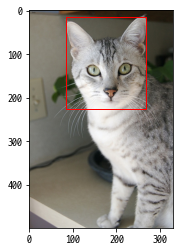

In [7]:
# 데이터 파일 설정
random_int = random.randint(1, len(bbox_files))
fname = bbox_files[random_int]
fpath = os.path.join(bbox_dir, fname)
tree = et.parse(fpath)
 
# 이미지 파일 설정
img_name = os.path.splitext(fname)[0] + '.jpg'
img_path = os.path.join(image_dir, img_name)
image = Image.open(img_path)
image = np.array(image)

# 얼굴 마스킹 설정
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin
rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill = False, color = 'red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

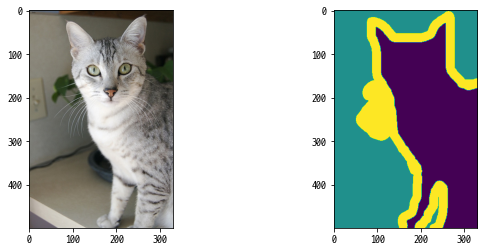

In [8]:
sname = os.path.splitext(fname)[0]+'.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)
seg = np.array(seg)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg)
plt.show()